# 1 пункт

In [75]:
%matplotlib inline

import matplotlib.pyplot as plt
from skimage.io import imshow, imread, imsave
import numpy as np

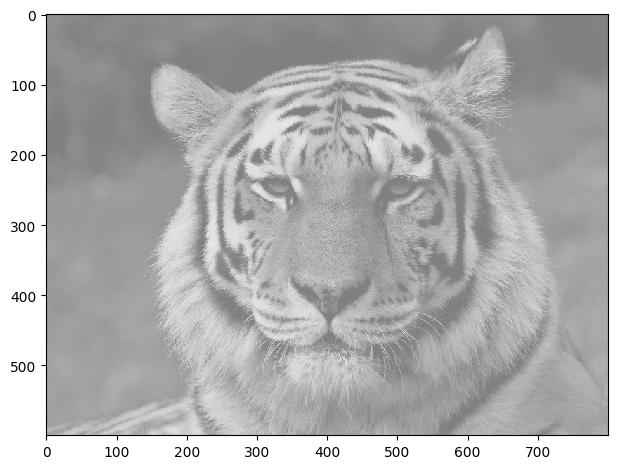

In [76]:
img = imread("img3/tiger-low-contrast.png")
imshow(img)

In [77]:
img

array([[144, 141, 141, ..., 128, 128, 128],
       [142, 143, 144, ..., 128, 128, 128],
       [142, 142, 140, ..., 128, 128, 128],
       ...,
       [172, 166, 168, ..., 178, 175, 170],
       [166, 167, 167, ..., 171, 172, 175],
       [166, 168, 167, ..., 174, 175, 174]], dtype=uint8)

In [78]:
x_max = np.max(img)
x_min = np.min(img)

def func_contrast(x, x_min, x_max):
    return (x - x_min) * (255 / (x_max - x_min)) 

img_out = img.copy()

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img_out[i][j] = func_contrast(img[i][j], x_min, x_max)

In [79]:
img_out

array([[ 40,  32,  32, ...,   0,   0,   0],
       [ 35,  37,  40, ...,   0,   0,   0],
       [ 35,  35,  30, ...,   0,   0,   0],
       ...,
       [110,  95, 100, ..., 125, 117, 105],
       [ 95,  97,  97, ..., 107, 110, 117],
       [ 95, 100,  97, ..., 115, 117, 115]], dtype=uint8)

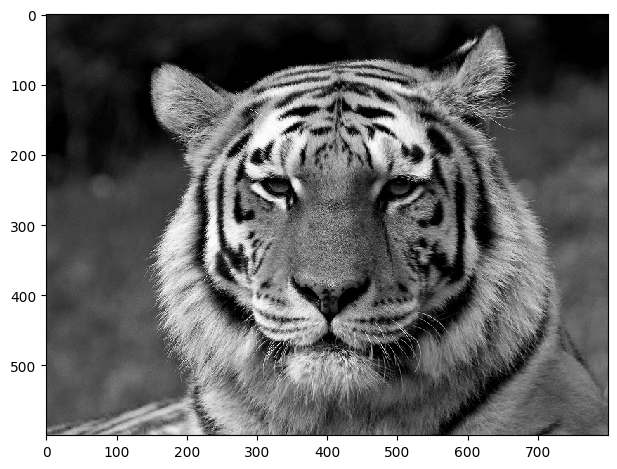

In [80]:
imshow(img_out)

In [81]:
img_out = img_out.astype("uint8")

In [82]:
img_out

array([[ 40,  32,  32, ...,   0,   0,   0],
       [ 35,  37,  40, ...,   0,   0,   0],
       [ 35,  35,  30, ...,   0,   0,   0],
       ...,
       [110,  95, 100, ..., 125, 117, 105],
       [ 95,  97,  97, ..., 107, 110, 117],
       [ 95, 100,  97, ..., 115, 117, 115]], dtype=uint8)

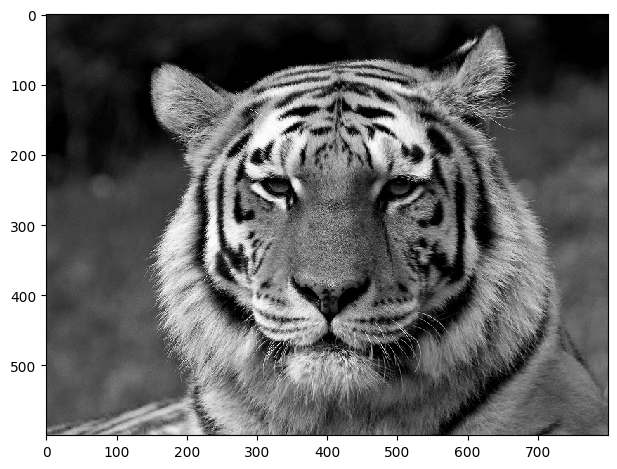

In [83]:
imsave("out_img.png", img_out)

imshow(img_out)

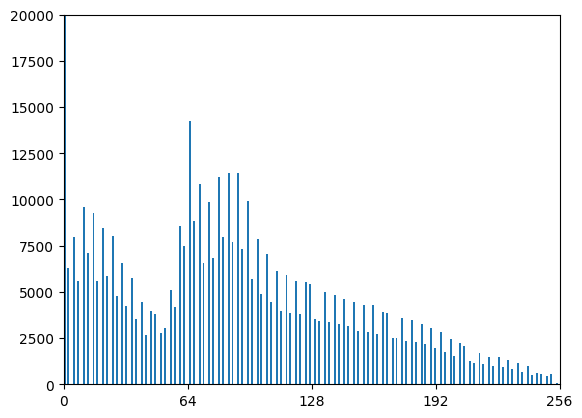

In [84]:
plt.hist(img_out.ravel(), bins=256)
plt.xlim(0, 256)
plt.ylim(0, 20000)
plt.xticks(np.arange(0, 257, 64))
plt.show()

# 2 пункт

In [93]:
img = imread("img3/tiger-low-contrast.png")

# count_elements = img.shape[0] * img.shape[1]

# k = round(count_elements * 0.05)

# print(count_elements)
# print(k)

tmp = img.ravel()
tmp.sort()

n = len(tmp) * 5 // 100

min_value, max_value = tmp[n], tmp[-n]

print(min_value, max_value)

129 208


# 3 пункт

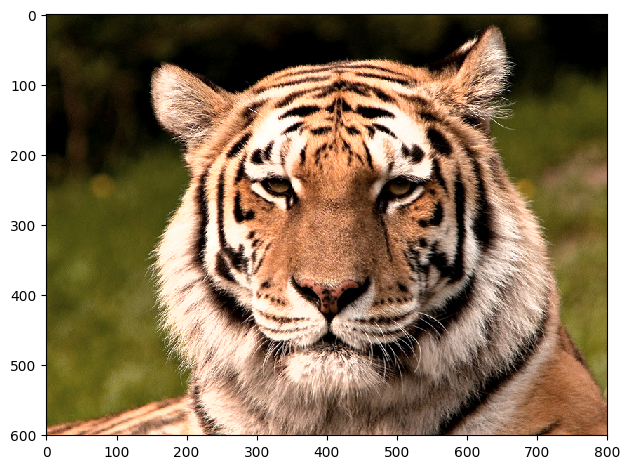

In [124]:
from skimage import img_as_float, img_as_ubyte

img = imread("img3/tiger-color.png")

red = img_as_float(img[:,:,0])
grean = img_as_float(img[:,:,1])
blue = img_as_float(img[:,:,2])

Y = 0.2126 * red + 0.7152 * grean + 0.0722 * blue
U = -0.0999 * red - 0.3360 * grean + 0.4360 * blue
V = 0.6150 * red - 0.5586 * grean - 0.0563 * blue

img_sort = np.sort(Y.flatten())
k = round(img_sort.size * 0.05)
x_min, x_max = img_sort[k], img_sort[-k-1]

Y = np.clip((Y - x_min) * (1 / (x_max - x_min)), 0, 1.0)

R = img_as_ubyte(np.clip(Y + 1.2803 * V, 0, 1.0))
G = img_as_ubyte(np.clip(Y + 0.2148 * U - 0.3805 * V, 0, 1.0))
B = img_as_ubyte(np.clip(Y + 2.1279 * U, 0, 1.0))

rgb = np.dstack((R, G, B))
imsave('out_img.png', rgb)
imshow(rgb)

# 4 пункт

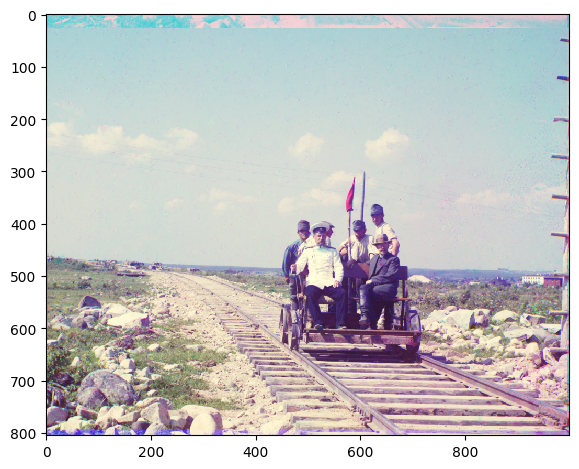

In [140]:
from skimage import img_as_float, img_as_ubyte

img = imread("img3/railroad.png")

red = img_as_float(img[:,:,0])
green = img_as_float(img[:,:,1])
blue = img_as_float(img[:,:,2])

R_av = np.average(red)
G_av = np.average(green)
B_av = np.average(blue)

avg = (R_av + G_av + B_av) / 3

avg

R_w = R_av / avg
G_w = G_av / avg
B_w = B_av / avg

R = red / R_w
G = green / G_w
B = blue / B_w

R = img_as_ubyte(np.clip(R, 0, 1.0))
G = img_as_ubyte(np.clip(G, 0, 1.0))
B = img_as_ubyte(np.clip(B, 0, 1.0))

rgb = np.dstack((R, G, B))
imsave('out_img.png', rgb)
imshow(rgb)

# 5 пункт

In [146]:
%matplotlib inline

from skimage import img_as_float, img_as_ubyte
import matplotlib.pyplot as plt

img = imread("img3/landscape.png")

# red = img_as_float(img[:,:,0])
# green = img_as_float(img[:,:,1])
# blue = img_as_float(img[:,:,2])

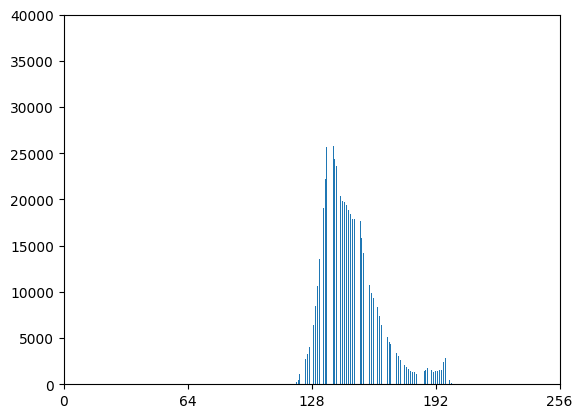

In [147]:
plt.hist(img.ravel(), bins=256)
plt.xlim(0, 256)
plt.ylim(0, 30000)
plt.xticks(np.arange(0, 257, 64))
plt.show()